The recommended reference for this lecture is *Introduction to Probability* by  Hwang and Blitzstein, available online [probabilitybook.net](https://probabilitybook.net). YouTube video lectures by the authors are available [here](https://goo.gl/i7njSb}{goo.gl/i7njSb)

In [1]:
# Importing standard modules. We will later import the probability distributions we need from Scipy.stats.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Key rules
### Joint and conditional probability
$$P(A,B) = P(A|B)P(B) = P(B|A)P(A).$$
### Bayes’ rule
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}.$$
### Odds
We define 
$$\mbox{odds}(A)=P(A)/P(A^c)$$
where $A^c$ is the complimentary of $A$ (i.e. everything else possible). 
It is easy to see that $P(A)= \mbox{odds}(A)/(1+ \mbox{odds}(A)).$
#### Bayes rule in odds form: 
since $P(A|B)=P(B|A)P(A)$ we have $$\mbox{odds}(A|B) =\frac{P(A|B)}{P(A^c|B)} =\frac{P(B|A)}{P(B|A^c)}\mbox{ odds}(A) ,$$
where the remaining term is the likelihood ratio. 
### Law of total probability (LOTP)
$$P(B)=\sum_{i=1}^n P(B,A_i)=\sum_{i=1}^n P(B|A_i)P(A_i)$$
### Remember: "conditional probability is a probability".
This means that he same rules that you apply to $P(x)$ should also be applied to $P(x|y)$. For example, Bayes rule
$$P(A|B,T)=\frac{P(B|A,T)P(A|T)}{P(B|T)}$$ 
and LOTP
$$P(B|T)=\sum_{i=1}^n P(B|A_i,T)P(A_i,T).$$
### Cumulative distribution functions
The cumulative distribution function (CDF) of an random variable $X$ is the function $F_X$ given by $$F_X (x) = P (X \leq x).$$
The CDF is an increasing function that converges to 1.

---

## Important Discrete Distributions

### 1. Discrete Uniform Distribution
Let $C$ be a finite, nonempty set of objects. Choose one of these objects uniformly at random. Call the chosen object X. Then X is said to have the Discrete Uniform distribution with parameter $|C|$, denoted by $X \sim U(|C|)$.

The probability mass function (PMF) of such $X$ is 
$$P_X(x)=\frac{1}{|C|}.$$

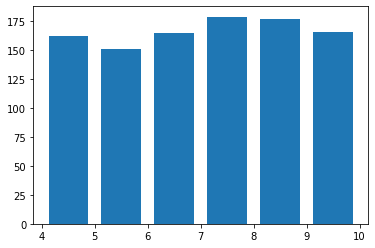

In [17]:
from scipy.stats import randint
r = randint.rvs(low=4, high=10, size=1000)  # This creates a sample of a given size from the distribution with the specified parameters
plt.hist(r,bins=range(4,11),rwidth=0.75);

### 2. Bernoulli and Binomial Distributions
An experiment that can result in either a “success” or a “failure” (but not both) is called a Bernoulli trial. It is defined by a single positive parameter $p\leq1$, which gives is PMF:
$$P_X (1) = p \mbox{ and } P_X (0) = 1-p.$$ We write this as $X \sim$ Bern$(p)$. 

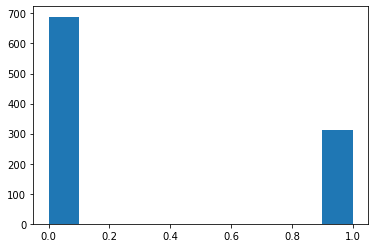

In [3]:
from scipy.stats import bernoulli
r = bernoulli.rvs(p=0.3, size=1000)
plt.hist(r);

Suppose that n independent Bernoulli trials are performed, each with the same success probability $p$. Let $X$ be the number of successes. The distribution of $X$ is called the Binomial distribution with parameters $n$ and $p$. We write $X \sim$ Bin$(n, p)$. 
The PMF of $X$ is
$$P_X(k)={n \choose k}p^k(1-p)^{n-k}$$
for $k = 0, 1, \cdots , n$ (and $P (X = k) = 0$ otherwise).
Often use $q=1-p$. 

The average of $X$ is given by $\langle X \rangle=np$ and its standard deviation by $\sigma=\sqrt{npq}$. 

mean = 5.0, variance = 2.5


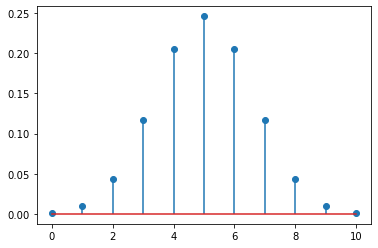

In [4]:
from scipy.stats import binom
dist = binom(n=10, p=0.5)   # This is called a frozen distribution: it has fixed parameters
x = np.arange(0,11)
plt.stem(x, dist.pmf(x),)     # Once we froze the distribution, we can use its PMF, CDF, and (as in the next line) its moments.   

print('mean = {}, variance = {}'.format(dist.mean(), dist.var()))

<div class="alert alert-block alert-info">
    <h4>Random walk.</h4>
A molecular motor moves $n$ steps on a microtubule. The motor starts at 0, and at each step it moves one step to the right or to the left, with equal probabilities. Assume all steps are independent. Let $Y$ be the motor's position after $n$ steps. 
If we let $n_L$ and $n_R$ be the number of steps taken to the left or to the right, then $Y = n_L - n_R$.

From the story of the Binomial distribution you can see that  $n_L \sim$ Bin$(n, {1}/{2})$. 
On average the motor stayed at the origin, because 
$$ \langle{Y}\rangle = \langle{(n_R-n_L)}\rangle = \langle{(n-2 n_L)}\rangle = n-2\langle{n_L}\rangle = n-2\frac{n}2 =0\,.$$
But the variance of the distance traveled is 
$$ \mbox{Var}(Y) = \langle{Y^2}\rangle = \langle{(n_R-n_L)^2}\rangle = \langle{(n-2 n_L)^2}\rangle = \langle{n^2-4 n n_L + 4 n_L^2)}\rangle = n^2 - 2n^2 + 4 \langle{n_L^2}\rangle = -n^2 + 4(\frac14n+\frac14n^2) = n\;.$$
The standard deviation is therefore $\sqrt{n}$, which means that after $n$ steps there is a very significant probability that the motor traveled very far, either to the right of to the left. 

In reality, of course, the motor uses ATP to  bias its motion, and the probabilities of left and right steps are no equal, which means that  $n_L \sim$ Bin$(n, q)$, and $\langle{Y}\rangle = n(1-2q)$.
</div>

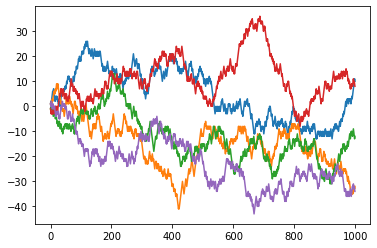

In [5]:
# simulate 5 relizations of a symmetric random walk
r = bernoulli.rvs(p=0.5, size=(1000,5))*2-1    # r are the steps, it takes the values +1 or -1 with equal probabbilitoes 
Y = np.cumsum(r,axis=0)
plt.plot(Y);

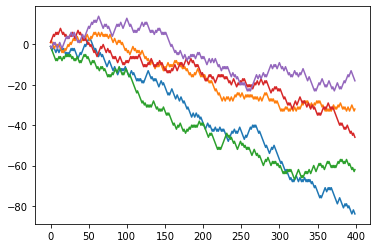

In [24]:
# here an example of a biased walk:
r = bernoulli.rvs(p=0.45, size=(400,5))*2-1  
Y = np.cumsum(r,axis=0)
plt.plot(Y);

<div class="alert alert-block alert-success">
    <h4> PMF of a function of a random variable, $g(X)$.</h4>
 Let $X$ be a discrete random variable. Then the support of the random variable $Y=g(X)$ is the set of all $y$ such that $g(x) = y$ for at least one $x$ in the support of $X$, and the PMF of $g(X)$ is
$$P(g(X)=y)=\sum_{x\mbox{ such that }g(x)=y}P(X=x),$$
for all y in the support of g(X).

For example, if $D$ be the random walker's distance from the origin after $n$ steps $D = |Y|$, the PMF of $D$ is 
$$P(D=k)=P(Y=k)+P(Y=-k)\,.$$

### 3. Hypergeometric Distribution
Every text in probability must have an urn  with $N$ balls,  $K$ of which are black. If we draw $n$ balls out of the urn one by one, replacing each ball after we examine it, then the number of black ball we see is distributed Bin$(n, K/N)$ since the draws are independent Bernoulli trials, each with probability $K/N$ of success. 

If  instead we do not put the balls back (known as sampling without replacement) then the number of black balls follows a Hypergeometric distribution $X \sim$ HGeom$(K, N, n)$ 
with PMF
$$P_X(k)=\frac{{K \choose k}{N-K\choose n-k}}{{N \choose n}}\;.$$

The mean of this distribution is $n\frac{K}{N}$, and the variance $\frac{n(N-n)}{N-1}\frac{K}{N}\frac{N-K}{N}$. 

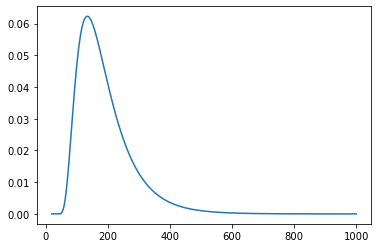

In [7]:
from scipy.stats import hypergeom
[k, K, n] = [2, 20, 20]
def unormalized_prior(N):
    return (100/101)**N
def posterior(N, k, K, n):
    return(hypergeom.pmf(k, N, n, K)*unormalized_prior(N))
N = np.arange(20, 1000)
plt.plot(N, posterior(N,k,K,n))#,width=0.4)

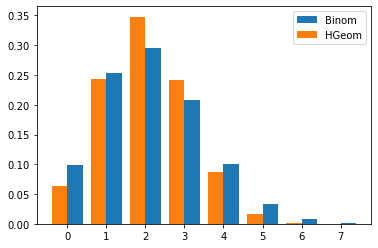

In [25]:
# Let us comapre he Binomial and Hypergeometric distributions when K/N is not very small

from scipy.stats import hypergeom
[N, K, n] = [40, 7, 12]
hyper_dist = hypergeom(N, K, n)   # again we use frozen distibutions, with the parameters defined in the previous line
binom_dist = binom(n, K/N)
x = np.arange(0, K+1)
plt.bar(x+0.2, binom_dist.pmf(x),label='Binom',width=0.4)
plt.bar(x-0.2, hyper_dist.pmf(x),label='HGeom',width=0.4)
plt.legend()

<div class="alert alert-block alert-info">
    <h4>Capture-recapture of mountain gorillas.</h4>
A mountain has $N$ gorillas. Today, $K$ of the gorillas are captured, tagged, and released into the wild. At a later date, $n$ gorillas are recaptured at random. 

By the story of the Hypergeometric, the number of tagged gorillas in the recaptured sample has the HGeom$(K, N , n)$ distribution.  This fact is used by ecologists to estimate the size of the gorilla population on the mountain.

Clearly, if the number $K \ll N$ we can assume that capturing the same gorilla twice is highly unlikely, so it really doesn't matter if we sample gorillas one by one (releasing each gorilla after we examine it) or capture all $n$ of them at ones. We could therefore use the Binomial distribution instead. 
Indeed, it is straightforward to show that in this limit the Hypergeometric PMF coincides with the Binomial PMF.
    </div>

<div class="alert alert-block alert-info">
    <h4>Fisher exact test.</h4>
 A scientist wishes to study whether women or men are more likely to have a certain disease, or whether they are equally likely. A random sample of $n$ women and $m$ men is gathered, and each person is tested for the disease (assume for this problem that the test is completely accurate). The numbers of women and men in the sample who have the disease are $X$ and Y respectively, with $X \sim $Bin$(n, p_w)$ and $Y \sim $Bin$(m, p_m)$, independently. Here $p_w$ and $p_m$ are unknown, and we are interested in testing whether $p_m = p_w$ (this is known as a null hypothesis in statistics).

Consider a $2 \times 2$ table with rows corresponding to disease status and columns corresponding to gender. Each entry is the count of how many people have that disease status and gender, so $n + m$ is the sum of all 4 entries. Suppose that it is observed that $X + Y = r$.

The Fisher exact test is based on conditioning on both the row and column sums, so $n, m, r$ are all treated as fixed, and then seeing if the observed value of $X$ is “extreme” compared to this conditional distribution. Assuming the null hypothesis, find the conditional PMF of X given X + Y = r.

Let’s compute the conditional PMF $P(X = x|X + Y = r)$. By Bayes’ rule,

$$P(X=x|X+Y=r)=\frac{P(X+Y=r|X=x)P(X=x)}{P(X+Y=r)}=\frac{P(Y=r-x)P(X=x)}{P(X+Y=r)}.$$
The step $P (X +Y = r|X = x) = P (Y = r -x)$ is justified by the independence of $X$ and $Y$ . Assuming the null hypothesis and letting $p = p_w = p_m$, we have $X \sim $Bin$(n, p)$ and $Y \sim$ Bin$(m, p)$ independently, so $X + Y \sim$ Bin$(n + m, p)$. Thus,
$$P(X=x|X+Y=r)=\frac{ {m \choose r-x}p^{r-x}(1-p)^{m-r+x}{n\choose x}p^x(1-p)^{n-x}}{ {n+m\choose r}p^r(1-p)^{n+m-r}} 
= \frac{{n\choose x}{m \choose r-x}}{{n+m \choose r}}.$$
So the conditional distribution of X is Hypergeometric with parameters $n, m, r$.
    </div>

### 4. Geometric Distribution
 Consider a sequence of independent Bernoulli trials, each with the same success probability $p$, with trials performed until a success occurs. Let $X$ be the number of failures before the first successful trial. Then $X$ has the Geometric distribution with parameter $p$; we denote this by $X \sim$ Geom$(p)$.
The PMF of a $X$ is $$P_X(k)=q^kp\,.$$
It mean is $(1-p)/p$ and its variance $(1-p)/p^2$. 

For example, if we flip a fair coin until it lands Heads for the first time, then the number of Tails before the first occurrence of Heads (the length of the run of tails) is distributed as Geom$({1}/{2})$.

<BarContainer object of 8 artists>

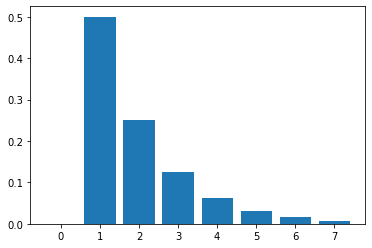

In [10]:
from scipy.stats import geom
x = np.arange(0, 8)
plt.bar(x, geom.pmf(x, p=0.5))

<div class="alert alert-block alert-info">
    <h4> St. Petersburg paradox.</h4>
 Suppose a wealthy stranger offers you the following game . You will flip a fair coin until it lands Heads for the first time, and  receive \$2 if the game lasts for 1 round, \$4 if the game lasts for 2 rounds, \$8 if the game lasts for 3 rounds, and in general $\$2^n$ if the game lasts for $n$ rounds. The stranger asks you to pay \$20 to participate in the game. Should you do it? 

One might reason as follows. The length of the game follows a geometric distribution, so its average is $(1-p)/p$ which in this case is 1. With this you might conclude that the expected reward is \$4, and decline the offer. 

But an alternative (correct!) reasoning is to calculate directly $\langle{2^n}\rangle=\sum_n{2^nq^np} = \frac{p}{1-2q}$ which diverges at $q={1}/{2}$. The expectation value of the reward is infinitly large, so you should pay whatever the stranger wants. 

This is an example of the important fact that in general $\langle{g(x)}\rangle$ is not $g(\langle{x}\rangle)$. 

### 5. Negative Binomial Distribution
In a sequence of independent Bernoulli trials with success probability $p$, if $X$ is the number of failures before the $r$th success, then $X$ is said to have the Negative Binomial distribution with parameters $r$ and $p$, denoted $X \sim$ NBin$(r, p)$.  Its PMF is 
$$ P_X(k) = {k+r-1 \choose k}(1-p)^rp^k\,.$$

Both the Binomial and the Negative Binomial distributions are based on independent Bernoulli trials; they differ in the stopping rule and in what they are counting: the Binomial counts the number of successes in a fixed number of trials, while the Negative Binomial counts the number of failures until a fixed number of successes.  

Note that if $X \sim$NBin$(r, p)$, then we can write $X = X_1 + \cdots + X_r$ where the $X_i$ are i.i.d. Geom($p$). 
From the linearity of the mean, the mean of $X$ is just $rp/(1-p)$ and its variance is $rp/(1-p)^2$. 

### Fitting count data. 
The negative Binomial is a popular empirical model for count data, e.g. from single-cell RNAseq experiments. 
Since it has two parameters it can be used to fit any required mean and variance, using $p=1-\mu/\sigma^2$ and $r=\mu^2/(\sigma^2-
\mu)$. 

RNAseq data has been shown to follow a negative Binomial rather closely, and some mechanistic models (stories) have been suggested. 

First RV mean = 2.00 and variance = 4.00
Second RV mean = 2.00 and variance = 2.22


<BarContainer object of 8 artists>

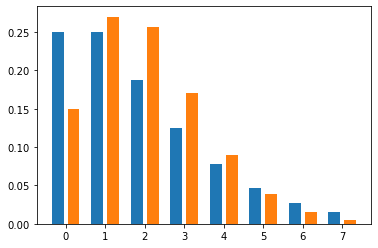

In [26]:
# Here is a demonstration of two different sets of parameters, which lead to the same the mean but differnet variances

from scipy.stats import nbinom

dist1=nbinom(2,0.5)
print('First RV mean = {:1.2f} and variance = {:1.2f}'.format(dist1.mean(),dist1.var()))
dist2=nbinom(18,0.9)
print('Second RV mean = {:1.2f} and variance = {:1.2f}'.format(dist2.mean(),dist2.var()))
plt.bar(x-0.2, dist1.pmf(x),  label='nbinom pmf',width=0.3)
plt.bar(x+0.2, dist2.pmf(x),  label='nbinom pmf',width=0.3)

### 6. Poisson distribution
We close our discussion of discrete distribution with one of the most useful ones. 

Suppose that we carry out a single-molecule  imaging in which we count transcription initiation events from a gene. Our experiment takes a minute, and we know that on average the initiation rate from this gene is 20 events per minute. How many initiation events will we see in our experiment?  


This is the case where we know that the rate of an event  $\lambda$ (in this example, 20/min), and we measure $X$ the number of times the event occurred during a particular unit of time. Then $X$ follows a Poisson distribution, $X \sim$ Pois$(\lambda)$.
The PMF of $X$ is
$$P_X(k)=e^{-\lambda}\frac{\lambda^k}{k!}\,.$$

Since both the mean of $X$ and the variance of $X$ are given by $\lambda$, a signature of the Poisson distribution is the ratio variance/mean=1.

An important property of Poisson variables is that their sum is also a Poisson variable. For example, suppose that our gene has two copies. Let $X_1$ be the number of transcription initiation events from the first copy in our one-minute video, $X_2$ from the second, and let $X = X_1+X_2$ the number of mRNA molecules initiated at that time. In this case, $X_1 \sim$ Pois$(\lambda_1), X_2 \sim$ Pois$(\lambda_2),$ and $X \sim$ Pois$(\lambda_1+\lambda_2).$ 

<div class="alert alert-block alert-info">
    <h4>Poisson approximation to Binomial.</h4>
 If $X \sim$ Bin$(n, p)$ and we let $n \to \infty$ and $p \to 0$ such that $\lambda = np$ remains fixed, then the PMF of $X$ converges to Pois$(\lambda)$. 

For example, you may want to estimate the distribution of mutations in a 1Mb sequence of bacterial DNA compared with an ancestral strain. Let's assume that the global rate of mutations is about 2/Mb, which means that the probability a single base has been mutated is $p=2\times10{-6}$. Calling a mutation "success", the number of mutations $m$ in our sequence is distributed as a Bin$(10^6, 2\times10^{-6})$. From the properties of the Binomial distribution we can calculate the mean $\left<n\right>=np = 2$ and the variance Var$[n]=np(1-p) = 2(1-2\times10^{-6})$. 
Notice that here variance/mean is very close to 1, which is the fingerprint of a Poisson distribution. 
Indeed, these are exactly the conditions where the Binomial and Poisson distribution coincide, and we could also use $n \sim$ Pois$(\lambda = np = 2)$. 

</div>

The mean of both distributions is 5.0. This is also the variance of the Poisson distribution,    
while the variance of the Binomial distribution is 4.75


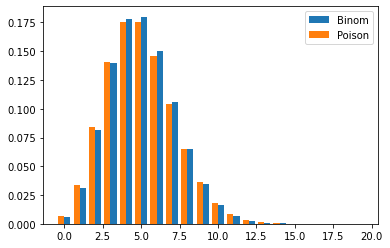

In [27]:
from scipy.stats import poisson
[n,p]=100,0.05
pois_dist = poisson(n*p)   # again we use frozen distibutions, with the parameters defined in the previous line
binom_dist = binom(n, p)
x = np.arange(0, 20)
plt.bar(x+0.2, binom_dist.pmf(x),label='Binom',width=0.4)
plt.bar(x-0.2, pois_dist.pmf(x),label='Poison',width=0.4)
plt.legend()

print('The mean of both distributions is {}. This is also the variance of the Poisson distribution,\
    \nwhile the variance of the Binomial distribution is {}'.format(pois_dist.mean(),binom_dist.var()))


<div class="alert alert-block alert-info">
    <h4>Poisson process.</h4>
    
A process where event occur in continuous time is called a Poisson process with rate $\lambda$ if the following two conditions hold:
<li> The number of events that occur in an interval of length $t$ is a Pois($\lambda t$) random variable.
<li> The numbers of events that occur in disjoint intervals are independent of each other.

</div>


<div class="alert alert-block alert-info">
    <h4> Birth/Death process.</h4>
mRNA molecules are transcribed from a gene with rate $\alpha$ and are degraded with rate $\beta$ (per molecule). At steady-state we have 
$$ (\alpha+m\beta) P(m)= \alpha P(m-1) +\beta (m+1) P(m+1)\;. $$
The LHS is the probability move away from a situation with $m$ molecules by either gaining one or losing one, and the RHS is the probability to move into a situation with $m$ molecules by either having $m-1$ molecules and transcriing one more, or having $m+1$ molecules and degrading one.
It is easy to check that this equation is solved by the PMF of the Poisson distribution with $\lambda=\alpha/\beta$, showing that at steady state the distribution of mRNA molecules in a population of cells follows the Poisson distribution. 

## Important Continuous Distributions

### PDF and CDF. 
Let $X$ be a continuous random variable. The probabailty density function (pdf) of $X$ is defined by 
$$ P(x<X<x+dx) = f_X(x)dx\;,$$
and is similar to the PMF of a discrete variable. 
The CFF of a continuous random variable $F_X(x)$, just like its discrete counterpart, if given by 
$$ F_X(x) = P(X\leq x).$$ 
The two are connected by 
$$F(x)=\int^x f_X(t)\,dt.$$

The PDF is nonnegative and normalized, $$\int f_X(x)\,dx = 1\,.$$

### 1. Normal distribution
A continuous random variable $Z$ is said to have the standard Normal distribution if its PDF $\phi$ is given by
$$\phi(z)=\frac{1}{\sqrt{2\pi}}e^{-z^2/2}$$
We write this as $Z\sim\mathcal{N}(0,1)$ indicating that $Z$ has mean 0 and variance 1.

It is extremely widely used in statistics because of  the central limit theorem.

<div class="alert alert-block alert-success">
    <h4>Central limit theorem. </h4>
Suppose that we have $n$ observation $X_1, X_2, \cdots X_n$ that are i.i.d. with mean $\mu$ and variance $\sigma^2$. We define their sample average as $\bar{X} = \frac1n\sum_i X_i$. This is a random variable with the same mean, and with standard deviation $\sigma/\sqrt{n}$. We can then define a "standardized' random variable $Y = \frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$ which has zero mean and standard deviation 1. The central limit theorem tells us that when $n \to \infty$, this random variable follows a normal distribution, 
$$Y\sim\mathcal{N}(0,1)\;.$$

If a random variable $X$ is given by 
$X=\mu+\sigma Z$, then it has a Normal distribution with mean $\mu$ and variance $\sigma^2$. We denote this by $X \sim \mathcal{N}(\mu,\sigma^2)$.
Of all probability distributions over the reals with a specified mean $\mu$  and variance $\sigma^{2}$, the normal distribution $\mathcal{N}(\mu,\sigma^2)$ is the one with maximum entropy (=ignorance). 

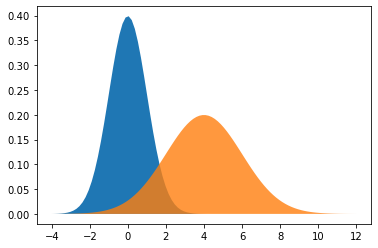

In [13]:
from scipy.stats import norm

[μ,σ]=4,2
standard_dist = norm()
normal_dist = norm(loc=μ,scale=σ)

x=np.linspace(-4,12,100)
plt.fill(x,standard_dist.pdf(x))
plt.fill(x,normal_dist.pdf(x),alpha=0.8)

### 2. Exponential distribution
Remember our gene that is transcribed 20 times per minute? Suppose that I start my single-molecule experiment now. How long do I need to wait before the first transcription initiation occurs? 

Recall that a Geometric random variable counts the number of failures before the first success in a sequence of Bernoulli trials. The story of the Exponential distribution is analogous, but we are now waiting for a success in continuous time, where successes arrive at a rate of $\lambda$ successes per unit of time. 
The PDF of this random variable is $$f_X(x)=\lambda e^{-\lambda x}\,.$$

<div class="alert alert-block alert-info">
    <h4> Memoryless property.</h4>
 A distribution is said to have the memoryless property if a random variable X from that distribution satisfies
$$P(X\geq s+t|X\geq s)=P(X\geq t)$$
for all $s, t > 0$.
If $X$ is a positive continuous random variable with the memoryless property, then $X$ has an Exponential distribution.

In the example about, this memoryless property reflects itself by the fact that I didn't need to know when exactly my experiment stats, or how long it has been since the previous transcription event. 

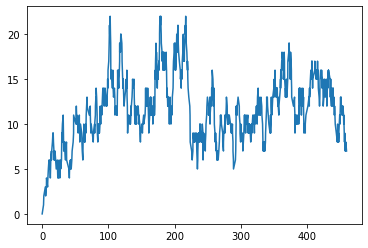

In [14]:
from scipy.stats import expon

# Let's simulate mRNA transcription/degradation process using Gillespie algorithm.
# At every iteration of this algorithm we choose the time of the next even from an exponential 
# distribution whose rate is the sum of all reaction rates.
# We then choose which event actually happens at that time by weighthing the possible events 
# according to their rates.

[α,β]=[1,0.1]                  # choose transcription/degradation parameters. 
sample_size = 50000
x = np.zeros(sample_size)
t = np.zeros(sample_size)

for i in range(sample_size-1) :
    a = np.array([α, β*x[i]])   # these are the rates of the two reactions
    a0 = a.sum()                # normalization 
    dt = expon.rvs(scale=1/a0)  # the waiting time to the next reaction follows exponential dist - this is a memoryless process
    t[i+1]= t[i]+dt
    ν = np.random.choice(len(a),1,p=a/a0) # ν is the next reaction (tsx or degradation)
    if ν == 0 : 
        x[i+1]=x[i]+1           # trancription
    else:
        x[i+1]=x[i]-1           # degradation

plt.plot(t[:1000],x[:1000])

In [15]:
x=x[500:] # to calcaulte steady-stae averages we discard early times
t=t[500:]

# to calculate averages we numerically carry the integral x(t)dt. 
dt = np.diff(t)
x_avg = sum(dt*x[1:])/t[-1]
xsqr_avg = sum(dt*x[1:]**2)/t[-1]
x_var = xsqr_avg - x_avg**2

print('We expect X~Pois(α/β), which means var=mean. We find mean {:1.3f} and var {:1.3f}.'.format(x_avg,x_var))


We expect X~Pois(α/β), which means var=mean. We find mean 9.925 and var 11.736.


### 3. Log-Normal distribution
A variable $X$ is distributed according to the log-normal distribution if $\log(X)$ follows a normal distribution. The log-normal distribution describes a product of random variables that are i.i.d: if $X =  \prod_i X_i$ then $\log{X} = \sum_i \log{X_i}$. Because the $X_i$'s are i.i.d so are the $\log X_i$'s. By the centra limit theorem $\log(X)$ follows a normal distribution and therefore $X$ follows a log-normal distribution. 

<div class="alert alert-block alert-success">
    <h4>Changing variables in probability distributions.</h4>
If $X$ is a continous random variable with pdf  $f_X(x)$, then the pdf of the random variable $Y = g(X)$ is $$ P_y(y) dy = P_x[f^{-1}(y)] |\frac{dx}{dy}|.$$ The term $\frac{dx}{dy}$ is the Jacobian of the transformation.

The PDF of this distribution is $$f_X(x)=\frac{1}{x\sigma\sqrt{2\pi}}e^{-\frac{(\log x-\mu)^2}{2\sigma^2}}\;.$$
Its mean is $e^{\mu+\sigma^2/2}$ and its variance is $(e^{\sigma^2}-1)e^{2\mu+\sigma^2}$.

The log-normal distribution is the maximum entropy probability distribution for a random variate $X$ for which the mean and variance of $\log(X)$ are known. 

(403.4287934927351, 2953.532754023369)

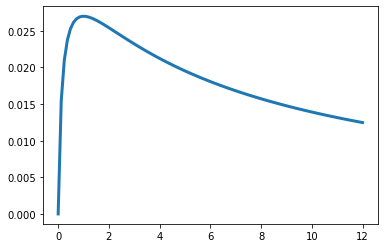

In [16]:
from scipy.stats import lognorm

[μ,σ]=4,2
lognorm_dist = lognorm(scale=np.exp(μ),s=σ) # remember that μ and σ are the mean and std of log(X), not X

x=np.linspace(0,12,100)
plt.plot(x,lognorm_dist.pdf(x),lw=3)

lognorm_dist.mean(), lognorm_dist.std() # you can check that these follow the forms mentioned above